<a href="https://colab.research.google.com/github/May-Moon-Colab/Business-Analytics/blob/main/Logistic_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Directory, libraries and data.

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [ ]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


In [ ]:
#data
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [ ]:
#Summary statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<AxesSubplot:title={'center':'crl.tot'}>,
        <AxesSubplot:title={'center':'dollar'}>],
       [<AxesSubplot:title={'center':'bang'}>,
        <AxesSubplot:title={'center':'money'}>],
       [<AxesSubplot:title={'center':'n000'}>,
        <AxesSubplot:title={'center':'make'}>]], dtype=object)

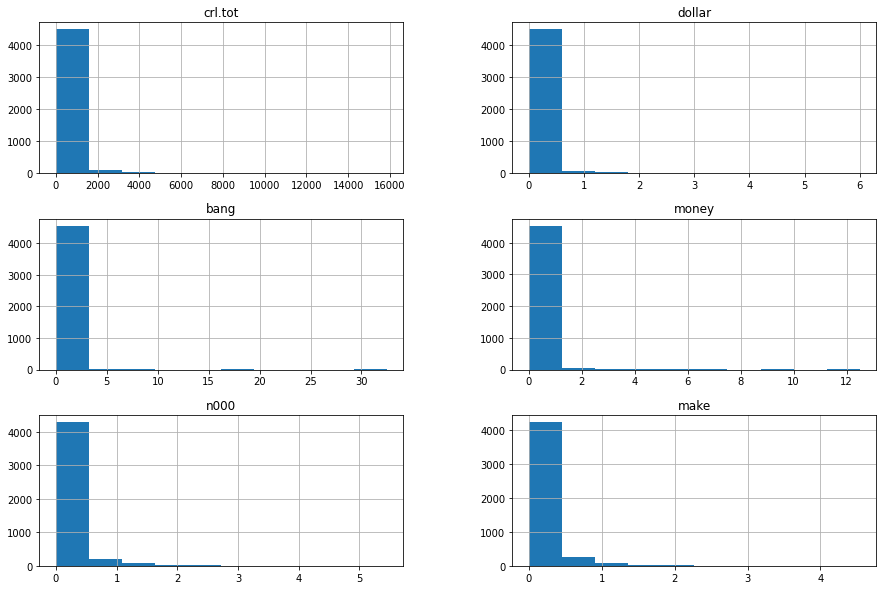

In [ ]:
#Histograms
df.hist(figsize= (15,10))

In [ ]:
#removing outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
df = df[df["bang"] <5]
df= df[df["money"]<6]
print(len(df))

4432
4432


<AxesSubplot:>

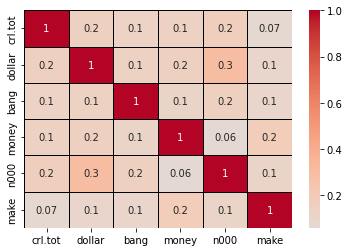

In [ ]:
#Correlation matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths =1,
            linecolor = 'black')

#Logistic Regression

In [ ]:
#prepare dependent variable
df["yesno"] = np.where(df["yesno"] == "y", 1, 0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [ ]:
#prepare the X and y
y = df.yesno
X = df.iloc[:,: -1]
X = sm.add_constant(X)
X.head(2)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [ ]:
#training and test set
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y,
                                                     test_size= 0.2,
                                                     random_state = 1502)

#Logistic regression


In [ ]:
#Logistic regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.4210
Time:                        18:10:01   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [ ]:
#Create the function
def logistic_reader(coefficient):
  probabilty = round((np.exp(coefficient)-1) * 100, 2)
  print (probabilty)

In [ ]:
#Apply the function
logistic_reader(5)

14741.32


#Assess the model

In [ ]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [ ]:
y_test

167     1
3125    0
2994    0
4150    0
3595    0
       ..
4393    0
383     1
33      1
2409    0
3179    0
Name: yesno, Length: 887, dtype: int64

In [ ]:
#check if dataset us balanced
y_test.mean()

0.35400225479143177

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


In [ ]:
#Accuracy
accuracy = (tp+tn)/ (tp + tn + fp + fn)
print("Accuracy:", round(accuracy*100, 1),"%")

#F1_score
f1 = 2* tp / (2 * tp + fn + fp)
print("F1_score:", round(f1 * 100, 1),"%")

#Specificity
specificity = tn / (tn + fp)
print("Specificity:", round(specificity*100, 1),"%")

#Sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity*100, 1),"%")

Accuracy: 83.0 %
F1_score: 73.7 %
Specificity: 91.4 %
Sensitivity: 67.5 %


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

